In [35]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
file_path = "15min-ETH-s1p1-20250107-TJS191_METUN_SAJAU_1S.csv"

data = pd.read_csv(file_path, header = 1)

data.to_csv('rmon.csv', index = False)

In [37]:
data.head()

,Time Stamp,RX Octs,TX Octs,RX Pkts,TX Pkts,RX Drop Events,Status,RX Undersize Pkts,Status.1,RX Fragments,...,TX Queue3 Discard,TX Queue4 Discard,TX Queue5 Discard,TX Queue6 Discard,TX Queue7 Discard,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Record Status
0,00:15,9175527480,1514703941,8335349,3524205,0,NORMAL,0,NORMAL,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,VALID
1,00:30,6942527191,1068587206,6378407,2801259,0,NORMAL,0,NORMAL,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,VALID
2,00:45,7941318350,1010057412,7164876,3122591,0,NORMAL,0,NORMAL,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,VALID
3,01:00,7270610327,1027084717,6650565,3131650,0,NORMAL,0,NORMAL,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,VALID
4,01:15,6035485150,807984471,5667669,2629199,0,NORMAL,0,NORMAL,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,VALID


In [38]:
data.insert(3, "RX Mbps", [0] * len(data))
data.insert(4, "TX Mbps", [0] * len(data))

In [39]:
# data

In [40]:
# Mengubah ke string untuk melakukan pembersihan data
data['RX Octs'] = data['RX Octs'].astype(str)
data['TX Octs'] = data['TX Octs'].astype(str)

In [41]:
# data['RX Octs'] = data['RX Octs'].str.replace('*', '', regex=False)  # Hapus karakter '*'
# data['TX Octs'] = data['TX Octs'].str.replace('*', '', regex=False)  # Hapus karakter '*'

# Periksa apakah kolom 'RX Octs' atau 'TX Octs' mengandung karakter '*'
if data['RX Octs'].str.contains(r'\*').any() or data['TX Octs'].str.contains(r'\*').any():
    # Hapus karakter '*' jika ditemukan
    data['RX Octs'] = data['RX Octs'].str.replace('*', '', regex=False)
    data['TX Octs'] = data['TX Octs'].str.replace('*', '', regex=False)
    print("Karakter '*' telah dihapus dari kolom RX Octs dan TX Octs.")
else:
    print("Tidak ada karakter '*' pada kolom RX Octs dan TX Octs. Lanjutkan.")


Tidak ada karakter '*' pada kolom RX Octs dan TX Octs. Lanjutkan.


In [42]:
# data['Time Stamp'] = data['Time Stamp'].replace('24:00', '00:00')
# data['Time Stamp'] = pd.to_datetime(data['Time Stamp'], format = '%H:%M').dt.time
data['RX Mbps'] = data['RX Mbps'].astype(float)
data['TX Mbps'] = data['TX Mbps'].astype(float)
data['RX Octs'] = data['RX Octs'].astype(float)
data['TX Octs'] = data['TX Octs'].astype(float)


In [43]:
# data

In [44]:
# data.dtypes


In [45]:
data['RX Mbps'] = (data['RX Octs'] * 8)/(60*15)/1000000
data['TX Mbps'] = (data['TX Octs'] * 8)/(60*15)/1000000

In [46]:
# data

In [47]:
# data['Time Stamp'] = data['Time Stamp'].replace('24:00', '00:00')
# data['Time Stamp'] = pd.to_datetime(data['Time Stamp'], format = '%H:%M')

# data['Time Stamp'] = pd.to_datetime(data['Time Stamp'])
# data['Time Interval'] = data['Time Stamp'].apply(lambda x: pd.date_range(start=x, periods=2, freq='15min').max())

In [48]:
# data.dtypes

In [49]:
# data

In [50]:
data =data.drop(index=95)

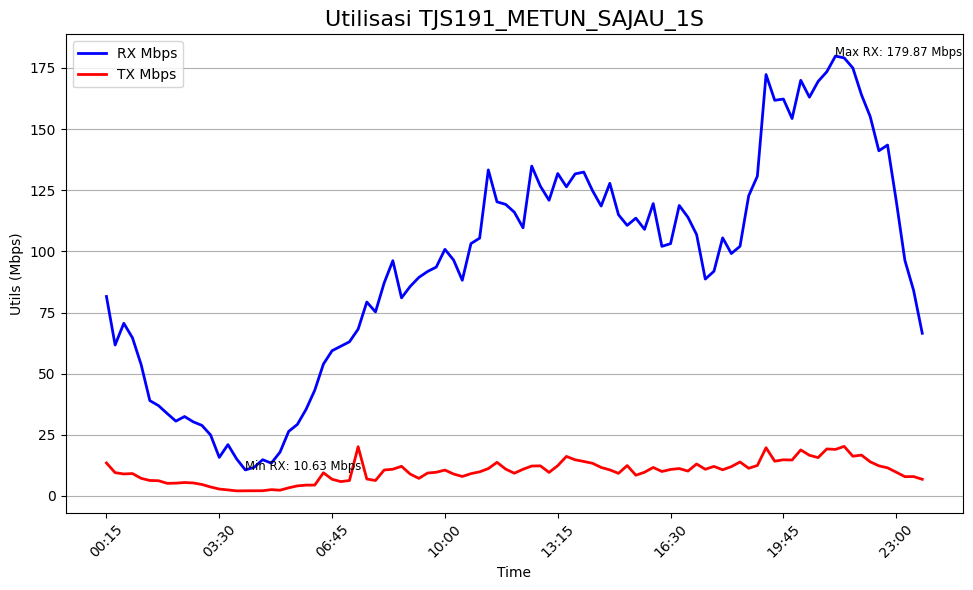

In [51]:
# Membuat grafik garis untuk RX Mbps dan TX Mbps
plt.figure(figsize=(10, 6))

# Plot RX Mbps dan TX Mbps
# plt.plot(data.index, data['RX Mbps'], label='RX Mbps', color='blue', marker='o', linestyle='-', linewidth=2)
# plt.plot(data.index, data['TX Mbps'], label='TX Mbps', color='red', marker='o', linestyle='-', linewidth=2)

# Plot RX Mbps dan TX Mbps
plt.plot(data['Time Stamp'], data['RX Mbps'], label='RX Mbps', color='blue', linestyle='-', linewidth=2)
plt.plot(data['Time Stamp'], data['TX Mbps'], label='TX Mbps', color='red', linestyle='-', linewidth=2)

# Menambahkan judul grafik
file_base = os.path.splitext(os.path.basename(file_path))[0]
title_part = file_base.split('-')[4]
plt.title(f"Utilisasi {title_part}", fontsize= 16)

plt.xlabel('Time')
plt.ylabel('Utils (Mbps)')

# Menambahkan legenda
plt.legend()

#interval data
# data['Time Stamp'] = pd.to_datetime(data['Time Stamp'])
# data['Time Interval'] = data['Time Stamp'].apply(lambda x: pd.date_range(start=x, periods=2, freq='15min').max())

# Menandai sumbu x berdasarkan index data
# plt.xlim([data['Time Stamp'].min(),data['Time Stamp'].max()])

# Menemukan nilai tertinggi
max_rx = data['RX Mbps'].max()
min_rx = data['RX Mbps'].min()

# Menampilkan baris data tertinggi
highest_rx = data.loc[data['RX Mbps'] == max_rx]
lowest_rx = data.loc[data['RX Mbps'] == min_rx]

# Menambahkan anotasi pada titik tertinggi
for idx, row in highest_rx.iterrows():
    plt.text(idx, row['RX Mbps'], f"Max RX: {row['RX Mbps']:.2f} Mbps", color='black', fontsize='small', ha='left')

for idx, row in lowest_rx.iterrows():
    plt.text(idx, row['RX Mbps'], f"Min RX: {row['RX Mbps']:.2f} Mbps", color='black', fontsize='small', ha='left')

# Menampilkan grafik
plt.grid(axis='y')
plt.xticks(data['Time Stamp'][::13], rotation=45)
plt.tight_layout()
plt.show()